# Analyzing Megaline

The data below is information I have collected while looking at the information provided by Megaline, a telecom operator. I have assessed a sample of 500 users and provided evidence that shows `Ultimate` is more profitable than `Surf`.


**Table of Contents** <br>
1.[Studying the general information](#general) - Studying the `user`, `messages`, `calls`, & `internet` dataframes making note of anomalies. <br>

   &emsp;1.1 [Users](#users)<br>
   &emsp;&emsp;1.1.1 [Users Conclusion](#usercon)<br>
   &emsp;1.2 [Calls](#calls)<br>
   &emsp;&emsp;1.2.1 [Calls Conclusion](#callscon)<br>
   &emsp;1.3 [Messages](#mess)<br>
  &emsp;&emsp;1.3.1 [Messages Conclusion](#messcon)<br>
   &emsp;1.4 [Internet](#intern)<br>
   &emsp;&emsp;1.4.1 [Internet Conclusion](#interncon)<br>
   &emsp;1.5 [Plans](#plans)<br>
   &emsp;&emsp;1.5.1 [Plans Conclusion](#planscon)<br>
   <br>
2.[Data Preprocessing](#preprocessing) - Identifying and eliminating potential problems.<br>
  &emsp; 2.1 [Users](#datapusers)<br> 
  &emsp; 2.2 [Calls](#datapcalls)<br>
  &emsp; 2.3 [Messages](#datapmess)<br>
  &emsp; 2.4 [Internet](#datapinter)<br>
  <br> 
  
3.[Analyzing Data](#analyzing) - Describing customers' behavior based on their plan. <br>
    &emsp; 3.1 [Surf](#Surf)<br>
    &emsp;&emsp;3.1.1 [Messages](#surfmess)<br>
    &emsp;&emsp;3.1.2 [Calls](#surfcall)<br>
    &emsp;&emsp;3.1.3 [Internet](#surfgb)<br>
    &emsp;&emsp;3.1.4 [Conclusion](#surfcon)<br>
    &emsp; 3.2 [Ultimate](#Ult)<br>
    &emsp;&emsp;3.2.1 [Messages](#ultmess)<br>
    &emsp;&emsp;3.2.2 [Calls](#ultcall)<br>
    &emsp;&emsp;3.2.3 [Internet](#ultgb)<br>
    &emsp;&emsp;3.2.4 [Conclusion](#ultcon)<br>
    
4.[Testing Hypothesis](#hypothesis)<br>
    &emsp; 4.1 [Hypothesis 1](#hypo1): The average profit from users of ultimate and surf calling plans differ<br>
    &emsp;&emsp;4.1.1 [Conclusion](#hypo1con)<br>
    &emsp; 4.2 [Hypothesis 2](#hypo2): The average profit from users in NY-NJ area is different from that of the users from other regions<br>
    &emsp;&emsp; 4.2.1 [Conclusion](#hypo2con)<br>
    

# 1. <a id='general'>Studying the general information</a>

In this section, I study the `user`, `messages`, `calls`, & `internet` dataframes and point out problems throughout the dataframe. 

## 1.1 <a id='users'>Megaline Users</a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

users = pd.read_csv("/datasets/megaline_users.csv")
users.dropna(axis = 1, how ='all', inplace = True)
users.info()

print("======= Amount Missing =======")
missing_values_count = users.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (users.isna().sum()/len(users)) * 100
print(null[null>0].sort_values())
print("======================")
display(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
======= Amount Missing =======
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64
======= Percent Missing =======
churn_date    93.2
dtype: float64


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### 1.1.1 <a id='userscon'>Megaline Users Conclusion</a>

After printing the info in the `Users` dataset I noticed anomalies with some of the column types. The `reg_date` and `churn_date` columns are of type object. They need to be date objects. Since the rest of the column types are correct, I went ahead and looked at the complete .csv file. 
The churn_date has missing information, but that is okay! It just means they have not cancelled their plan (93%) which is **great for retention**!

## 1.2 <a id='users'>Megaline Calls</a>

In [2]:
calls = pd.read_csv("/datasets/megaline_calls.csv")
calls.info()
#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = calls.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (calls.isna().sum()/len(calls)) * 100
print(null[null>0].sort_values())
print("======================")
display(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
======= Amount Missing =======
id           0
user_id      0
call_date    0
duration     0
dtype: int64
======= Percent Missing =======
Series([], dtype: float64)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### 1.2.1 <a id='callscon'>Megaline Calls Conclusion</a>

After carefully inspecting the data, there exists anomalies in the `call_date` column. When performing data preprocessing, I would have to change the type from object to date. 
One thing that could be done for the `duration` column is the rounding up of calls. The company counts 1 second calls as 1 minute calls; therefore, we could **round up the calls and change the type of the column from float to int** . 

Calls with zero duration may be accidental butt dials, misclicks or a sign that something in the data is not right. I will investigate in the data preprocessing section.

### 1.3 <a id='mess'>Megaline Messages</a>

In [3]:
messages = pd.read_csv("/datasets/megaline_messages.csv")
messages.info()
#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = messages.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (messages.isna().sum()/len(messages)) * 100
print(null[null>0].sort_values())
print("======================")
display(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
======= Amount Missing =======
id              0
user_id         0
message_date    0
dtype: int64
======= Percent Missing =======
Series([], dtype: float64)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### 1.3.1 <a id='messcon'>Megaline Messages Conclusion</a>

The `message_date` column could be changed from object to date.

## 1.4. <a id='intern'>Megaline Internet</a>

In [4]:
internet = pd.read_csv("/datasets/megaline_internet.csv")
internet.info()
#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = internet.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (internet.isna().sum()/len(internet)) * 100
print(null[null>0].sort_values())
print("======================")
display(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
======= Amount Missing =======
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
======= Percent Missing =======
Series([], dtype: float64)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### 1.4.1 <a id='interncon'> Megaline Internet Conclusion </a>

The total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
The `session_date` column could be changed from object to date.
Note: could the `mb_used` be rounded up? 

1 GB = 1024 MB

The second session listed in the table has a mb_used value of 0 which may or may not pose a problem when it comes to our analysis later on. Right now I assume if a customer does not have a session date, they did not access the internet on that day. Having a session date with 0.00 poses a problem because it informs us that the customer did access the internet, but something wetn awry.

## 1.5 <a id='plans'>Megaline Plans </a>

In [5]:
plans = pd.read_csv("/datasets/megaline_plans.csv")
plans.info()
#Finding out sum & percentage of missing values in each feature.
print("======= Amount Missing =======")
missing_values_count = plans.isnull().sum()
print(missing_values_count[0:10])
print("======= Percent Missing =======")
null = (plans.isna().sum()/len(plans)) * 100
print(null[null>0].sort_values())
print("======================")
display(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
======= Amount Missing =======
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
======= Percent Missing =======
Series([], dtype: float64)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### 1.5.1 <a id='planscon'> Megaline Plans Conclusion </a>

No immediate change necessary.

# 2 <a id='preprocessing'> Data Preprocessing </a>

In this section, I will convert data types in each data set.

### 2.1 <a id='datapusers'>Users</a>

- Changing `reg_date` and `churn_date` from object data type to datetime data type. 

In [6]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null datetime64[ns]
plan          500 non-null object
churn_date    34 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### 2.2 <a id='datapcalls'>Calls</a>

- Changing `call_date` from object to datetime. Note: Could POSSIBLY do something about the gb
- Rounding up `duration` and changing data type to int. 

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = calls['duration'].apply(np.ceil).astype('int64')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


### 2.3 <a id='datapmess'>Messages</a>

- Change `message_date` from object to datetime data type.

In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### 2.4 <a id='datapintern'>Internet</a>

- Change `session_date` from object to datetime object.  NOTE: might have to do something with `mb_used`. REVISIT

In [9]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


df frame displays correct information. Need to add Name and plan of user.

In [10]:
import math
df = pd.DataFrame()

users['fullname'] = users['first_name'].str.cat(users['last_name'], sep=" ")
users['month'] = users['reg_date'].dt.month
users_df = users.groupby(['user_id', 'month', 'city']).agg({'fullname':'min', 'plan':'min', 'city': 'min'})
users_df.columns = ['fullname', 'cust_plan', 'cust_city']

calls['month'] = calls['call_date'].dt.month
calls_df = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}) # amount of times customer appears on calls list
calls_df.reset_index()
calls_df['duration'] = calls_df['duration'].astype(int)

messages['month'] = messages['message_date'].dt.month
messages_df = messages.groupby(['user_id', 'month']).agg({'user_id': 'count'}) # number of text messages each customer has sent per month
messages_df.columns = ['messages_sent']
messages_df['messages_sent'] = messages_df['messages_sent'].astype(int)
messages_df.reset_index()

internet['month'] = internet['session_date'].dt.month
internet_df = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}) # amount of data used per customer.
#internet_df.sample(15)

super_df = calls_df.merge(messages_df,on=["user_id", "month"]).merge(internet_df,on=["user_id", "month"])
super_df = super_df.reset_index()
df = users_df.merge(super_df, on="user_id")
df.head(20)


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used
0,1000,Anamaria Bauer,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12,124,11,1901.47
1,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",8,182,30,6919.15
2,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",9,315,44,13314.82
3,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,393,53,22330.49
4,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,426,36,18504.30
5,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",12,412,44,19369.18
6,1002,Carlee Hoffman,surf,"Las Vegas-Henderson-Paradise, NV MSA",10,59,15,6552.01
7,1002,Carlee Hoffman,surf,"Las Vegas-Henderson-Paradise, NV MSA",11,386,32,19345.08
8,1002,Carlee Hoffman,surf,"Las Vegas-Henderson-Paradise, NV MSA",12,384,41,14396.24
9,1003,Reynaldo Jenkins,surf,"Tulsa, OK MSA",12,1104,50,27044.14


In [11]:
# Calculating profit

def monthly_prof(row):
    plan = row['cust_plan']
    duration = row['duration']
    messages = row['messages_sent']
    mb = row['mb_used']
    
    if plan == 'surf':
        total = 0
        monthCalldur = 500 - duration # month call duration (minutes)
        monthMessnum = 50 - messages
        monthDatause = math.ceil(mb/1024)
        if monthDatause < 0:
            total += abs(monthDatause) * 10
        if monthCalldur < 0:
            total += abs(monthCalldur) * 0.03
        if monthMessnum < 0:
            total += total + abs(monthMessnum) * 0.03
        total += 20
        return total
    else:
        total = 0
        monthCalldur = 3000 - duration # month call duration (minutes)
        monthMessnum = 1000 - messages
        monthDatause = math.ceil(mb/1024)
        if monthDatause < 0:
            total += abs(monthDatause) * 7
        if monthCalldur < 0:
            total += abs(monthCalldur) * 0.01
        if monthMessnum < 0:
            total += total + abs(monthMessnum) * 0.01
        total += 70
        return total

row_values = 4
row = pd.Series(data=row_values, index=['cust_plan', 'duration', 'messages_sent', 'mb_used'])
monthly_prof(row)
df['profit'] = df.apply(monthly_prof, axis=1)
df

,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit
0,1000,Anamaria Bauer,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",12,124,11,1901.47,70.00
1,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",8,182,30,6919.15,20.00
2,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",9,315,44,13314.82,20.00
3,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,393,53,22330.49,20.09
4,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,426,36,18504.30,20.00
...,...,...,...,...,...,...,...,...,...
1754,1496,Ariel Shepherd,surf,"New Orleans-Metairie, LA MSA",9,414,21,16389.27,20.00
1755,1496,Ariel Shepherd,surf,"New Orleans-Metairie, LA MSA",10,317,18,14287.36,20.00
1756,1496,Ariel Shepherd,surf,"New Orleans-Metairie, LA MSA",11,308,13,8547.36,20.00
1757,1496,Ariel Shepherd,surf,"New Orleans-Metairie, LA MSA",12,294,11,16438.99,20.00


To calculate profit, I created a function that took in a customer's plan, the monthly duration of a customer's calls, the amount of messages sent per month and the amount of mb a customer used as indexes. I then subtracted what is covered depending on their plan, and added the extra cost if they went over their messaging, call or internet limits to their total.

### 3 <a id='analyzing'>Analyzing the Data</a>

### 3.1 <a id='Surf'>Surf</a>

#### 3.1.1 <a id='surfmess'>Messages</a>

messages mean: 39.49
messages var: 1044.22
messages std: 32.31


Text(0.5, 1.0, 'Messages Sent')

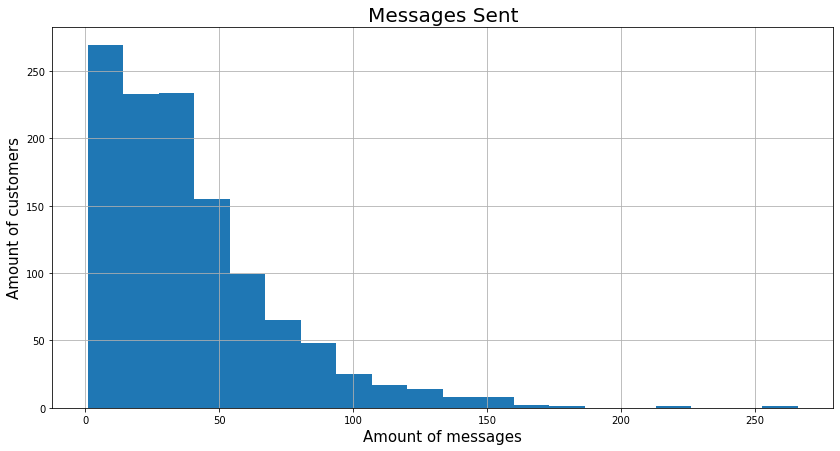

In [12]:
# divide into two different groups

by_plansurf = df.groupby("cust_plan")
surf = by_plansurf.get_group("surf")

# calculating the mean, var, and standard dev of messages sent in surf
surfmess_mean = surf['messages_sent'].mean().round(2)
surfmess_var = surf.var()['messages_sent'].round(2)
surfmess_std = surf.std()['messages_sent'].round(2)

print('messages mean:', surfmess_mean)
print('messages var:', surfmess_var)
print('messages std:', surfmess_std)

surf['messages_sent'].hist(bins=20,grid=True, figsize=(14,7))
plt.xlabel("Amount of messages", fontsize=15)
plt.ylabel("Amount of customers",fontsize=15)
plt.title('Messages Sent', fontsize=20)

In [30]:
surf_over_mess = surf.loc[surf['messages_sent'] > 50]
temp = np.unique(surf_over_mess['fullname'])
print("The amount of customers exceeding their messaging limit is:", len(np.unique(surf_over_mess["fullname"])), "or", (len(np.unique(surf_over_mess["fullname"]))/262)*100, "%")
surf_over_mess.head(20)
#1180 rows, 10 columns

# surf has 262 customers, 107 have gone over their messaging limit.  

The amount of customers exceeding their messaging limit is: 107 or 40.839694656488554 %


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit,GB
3,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,393,53,22330.49,20.09,22
21,1007,Eusebio Welch,surf,"Grand Rapids-Kentwood, MI MSA",8,456,51,24439.88,20.03,24
23,1007,Eusebio Welch,surf,"Grand Rapids-Kentwood, MI MSA",10,645,59,37885.63,28.97,37
38,1014,Edmundo Simon,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",12,1114,64,7792.41,57.26,8
39,1015,Beata Carpenter,surf,"Pittsburgh, PA MSA",12,96,68,17495.12,20.54,18
52,1019,Shizue Landry,surf,"Jacksonville, FL MSA",12,467,128,28127.77,22.34,28
96,1035,Jeff Cummings,surf,"Charlotte-Concord-Gastonia, NC-SC MSA",12,627,66,15500.04,28.10,16
130,1046,Beata Hooper,surf,"Boston-Cambridge-Newton, MA-NH MSA",7,509,51,22016.18,20.57,22
137,1051,Rosario Gibbs,surf,"San Diego-Chula Vista-Carlsbad, CA MSA",12,173,60,10369.73,20.30,11
138,1052,Edmond Hopkins,surf,"Houston-The Woodlands-Sugar Land, TX MSA",11,207,52,4650.40,20.06,5


#### 3.1.2 <a id='surfcall'>Calls</a>

minutes mean: 445.78
minutes var: 55321.41
minutes std: 235.21


Text(0.5, 1.0, 'Minutes used')

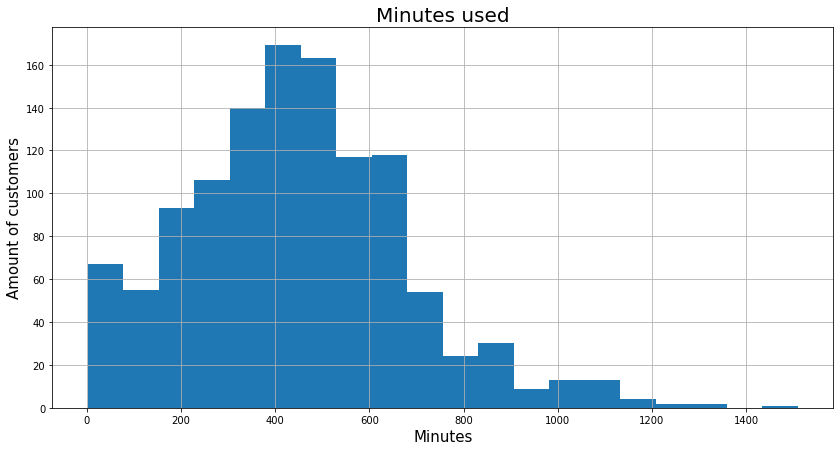

In [14]:
# calculating the mean, var, and standard dev of minutes in surf
surfmin_mean = surf['duration'].mean().round(2)
surfmin_var = surf.var()['duration'].round(2)
surfmin_std = surf.std()['duration'].round(2)

print('minutes mean:', surfmin_mean)
print('minutes var:', surfmin_var)
print('minutes std:', surfmin_std)

surf['duration'].hist(bins=20,grid=True, figsize=(14,7))
plt.xlabel("Minutes", fontsize=15)
plt.ylabel("Amount of customers",fontsize=15)
plt.title('Minutes used', fontsize=20)

In [15]:
surf_over_call = surf.loc[surf['duration'] > 500]
results = np.unique(surf_over_call['fullname'])
print("The amount of customers exceeding their minute limit is:", len(np.unique(surf_over_call["fullname"])), "or", (147/262)*100, "%")
surf_over_call.head(20)


The amount of customers exceeding their minute limit is: 147 or 56.10687022900763 %


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit
9,1003,Reynaldo Jenkins,surf,"Tulsa, OK MSA",12,1104,50,27044.14,38.12
23,1007,Eusebio Welch,surf,"Grand Rapids-Kentwood, MI MSA",10,645,59,37885.63,28.97
24,1007,Eusebio Welch,surf,"Grand Rapids-Kentwood, MI MSA",11,524,48,24334.00,20.72
25,1007,Eusebio Welch,surf,"Grand Rapids-Kentwood, MI MSA",12,617,50,29069.28,23.51
38,1014,Edmundo Simon,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",12,1114,64,7792.41,57.26
41,1016,Jann Salinas,surf,"Fresno, CA MSA",11,649,46,27501.33,24.47
42,1016,Jann Salinas,surf,"Fresno, CA MSA",12,837,38,28188.01,30.11
49,1018,Dennis Grimes,surf,"Indianapolis-Carmel-Anderson, IN MSA",11,636,5,15266.53,24.08
76,1029,Franklyn Henson,surf,"Tampa-St. Petersburg-Clearwater, FL MSA",9,763,9,13719.06,27.89
77,1029,Franklyn Henson,surf,"Tampa-St. Petersburg-Clearwater, FL MSA",10,692,12,17605.99,25.76


#### 3.1.3 <a id='surfgb'>Internet</a>

internet mean: 16.75
internet var: 57.01
internet std: 7.55


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'GB Used')

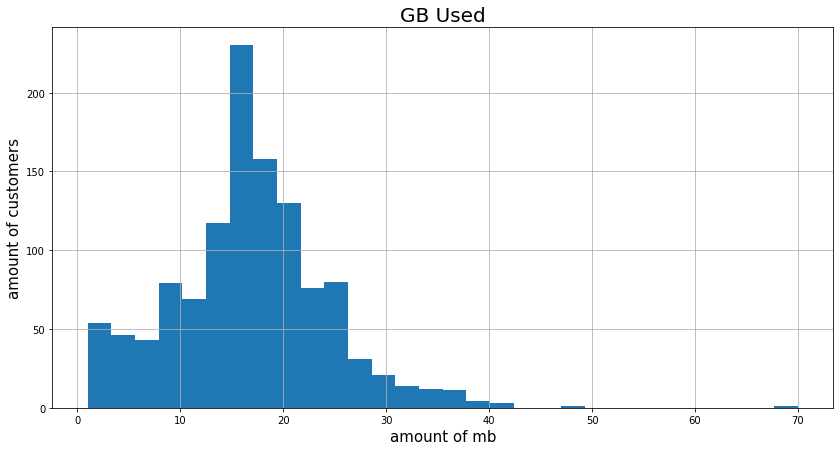

In [16]:
# calculating the mean, var, and standard dev of mb used (assuming volume)

def mb_to_gb(row):
    mb = row['mb_used']
    GB = math.ceil(mb/1024)
    return GB

row_values = 4
row = pd.Series(data=row_values, index=['mb_used'])
mb_to_gb(row)
surf['GB'] = surf.apply(mb_to_gb, axis=1)

surfgb_mean = surf['GB'].mean().round(2)
surfgb_var = surf.var()['GB'].round(2)
surfgb_std = surf.std()['GB'].round(2)

print('internet mean:', surfgb_mean)
print('internet var:', surfgb_var)
print('internet std:', surfgb_std)

surf['GB'].hist(bins=30,grid=True, figsize=(14,7))
plt.xlabel("amount of mb", fontsize=15)
plt.ylabel("amount of customers",fontsize=15)
plt.title('GB Used', fontsize=20)

In [17]:
overmb = surf.loc[surf['GB'] > 15]
results = np.unique(overmb['fullname'])
print("The amount of customers exceeding their minute limit is:", len(np.unique(overmb["fullname"])), "or", (206/262)*100, "%")
overmb.head(20)

The amount of customers exceeding their minute limit is: 206 or 78.62595419847328 %


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit,GB
3,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",10,393,53,22330.49,20.09,22
4,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,426,36,18504.30,20.00,19
5,1001,Mickey Wilkerson,surf,"Seattle-Tacoma-Bellevue, WA MSA",12,412,44,19369.18,20.00,19
7,1002,Carlee Hoffman,surf,"Las Vegas-Henderson-Paradise, NV MSA",11,386,32,19345.08,20.00,19
9,1003,Reynaldo Jenkins,surf,"Tulsa, OK MSA",12,1104,50,27044.14,38.12,27
11,1004,Leonila Thompson,surf,"Seattle-Tacoma-Bellevue, WA MSA",6,275,18,20672.82,20.00,21
12,1004,Leonila Thompson,surf,"Seattle-Tacoma-Bellevue, WA MSA",7,381,26,24516.62,20.00,24
13,1004,Leonila Thompson,surf,"Seattle-Tacoma-Bellevue, WA MSA",8,354,25,27981.74,20.00,28
14,1004,Leonila Thompson,surf,"Seattle-Tacoma-Bellevue, WA MSA",9,301,21,18852.72,20.00,19
16,1004,Leonila Thompson,surf,"Seattle-Tacoma-Bellevue, WA MSA",11,476,25,21850.78,20.00,22


### 3.2 <a id='Ult'>Ultimate</a>

#### 3.2.1 <a id='ultmess'>Messages</a>

messages mean: 46.46
messages var: 1084.39
messages std: 32.93


Text(0.5, 1.0, 'Messages Sent')

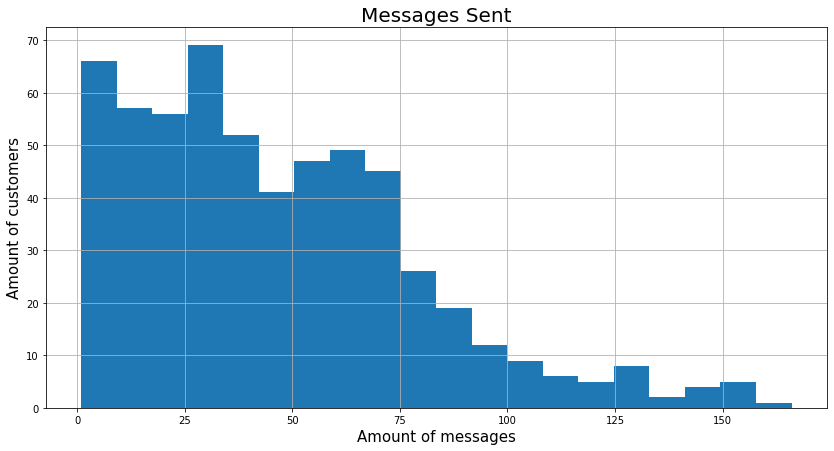

In [18]:
by_planult = df.groupby("cust_plan")
ult = by_planult.get_group("ultimate")

# calculating the mean, var, and standard dev of minutes in ultimate
ultmess_mean = ult['messages_sent'].mean().round(2)
ultmess_var = ult.var()['messages_sent'].round(2)
ultmess_std = ult.std()['messages_sent'].round(2)

print('messages mean:', ultmess_mean)
print('messages var:', ultmess_var)
print('messages std:', ultmess_std)

ult['messages_sent'].hist(bins=20,grid=True, figsize=(14,7))
plt.xlabel("Amount of messages", fontsize=15)
plt.ylabel("Amount of customers",fontsize=15)
plt.title('Messages Sent', fontsize=20)

In [19]:
ult_over_mess = ult.loc[ult['messages_sent'] > 1000]
ulttemp = np.unique(ult_over_mess['fullname'])
print("The amount of customers exceeding their messaging limit is:", len(np.unique(ult_over_mess["fullname"])))
ult_over_mess.head(20)

The amount of customers exceeding their messaging limit is: 0


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit


#### 3.1.2 <a id='ultcall'>Calls</a>

duration mean: 442.51
duration var: 62288.4
duration std: 249.58


Text(0.5, 1.0, 'Minutes Used')

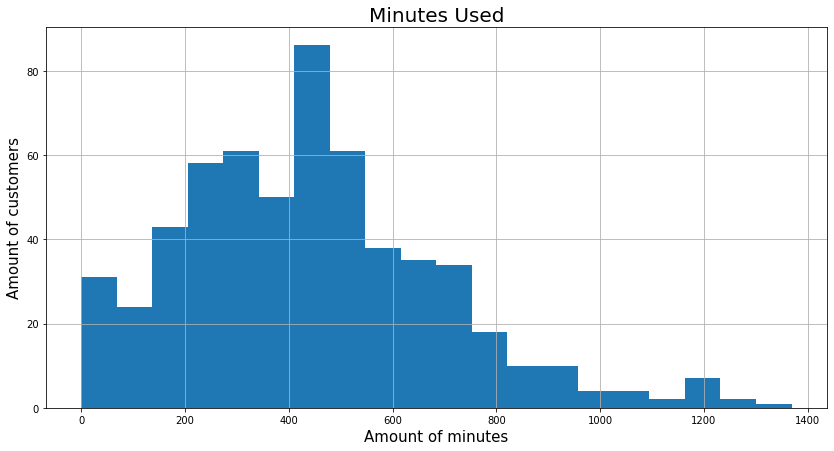

In [20]:
#### calculating the mean, var, and standard dev of messages sent in ultimate
ultmin_mean = ult['duration'].mean().round(2)
ultmin_var = ult.var()['duration'].round(2)
ultmin_std = ult.std()['duration'].round(2)

print('duration mean:', ultmin_mean)
print('duration var:', ultmin_var)
print('duration std:', ultmin_std)

ult['duration'].hist(bins=20,grid=True, figsize=(14,7))
plt.xlabel("Amount of minutes", fontsize=15)
plt.ylabel("Amount of customers",fontsize=15)
plt.title('Minutes Used', fontsize=20)

In [21]:
ult_over_min = ult.loc[ult['duration'] > 3000]
results = np.unique(ult_over_min['fullname'])
print("The amount of customers exceeding their minute limit is:", len(np.unique(ult_over_min["fullname"])))
ult_over_min.head(20)

The amount of customers exceeding their minute limit is: 0


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit


#### 3.1.2 <a id='ultgb'>Internet</a>

internet mean: 17.34
internet var: 56.17
internet std: 7.49


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'GB Used')

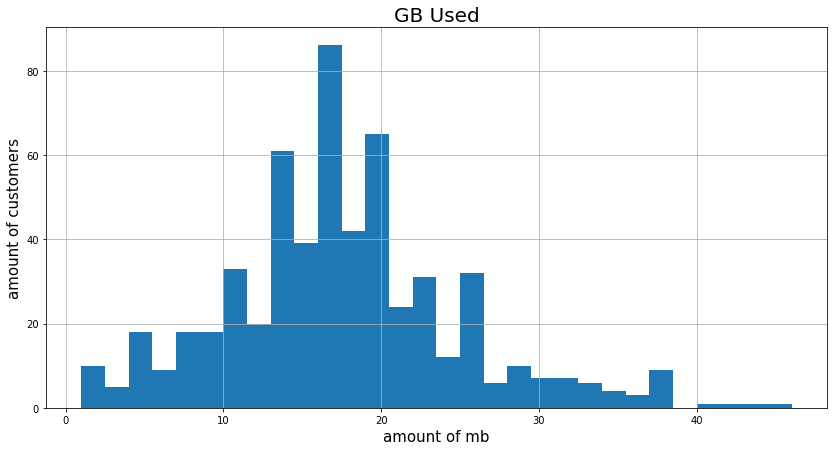

In [22]:
# calculating the mean, var, and standard dev of mb used (assuming volume)
mb_to_gb(row)
ult['GB'] = ult.apply(mb_to_gb, axis=1)

ultgb_mean = ult['GB'].mean().round(2)
ultgb_var = ult.var()['GB'].round(2)
ultgb_std = ult.std()['GB'].round(2)

print('internet mean:', ultgb_mean)
print('internet var:', ultgb_var)
print('internet std:', ultgb_std)

ult['GB'].hist(bins=30,grid=True, figsize=(14,7))
plt.xlabel("amount of mb", fontsize=15)
plt.ylabel("amount of customers",fontsize=15)
plt.title('GB Used', fontsize=20)

In [23]:
ult_over_mb = ult.loc[ult['GB'] > 30]
results = np.unique(ult_over_mb['fullname'])
print("The amount of customers exceeding their internet limit is:", len(np.unique(ult_over_mb["fullname"])), "or", (14/238)*100, "%")
ult_over_mb.head(20)

The amount of customers exceeding their internet limit is: 14 or 5.88235294117647 %


,user_id,fullname,cust_plan,cust_city,month,duration,messages_sent,mb_used,profit,GB
20,1006,Jesusa Bradford,ultimate,"San Francisco-Oakland-Berkeley, CA MSA",12,59,139,32118.82,70.0,32
65,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",3,39,66,36061.04,70.0,36
66,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",4,53,77,37761.59,70.0,37
67,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",5,67,84,32907.83,70.0,33
68,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",6,49,66,37907.14,70.0,38
69,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",7,53,85,38826.70,70.0,38
70,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",8,76,74,40388.21,70.0,40
72,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",10,39,73,46595.33,70.0,46
73,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",11,69,77,42952.59,70.0,42
74,1028,Jefferey Rasmussen,ultimate,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",12,43,74,37603.26,70.0,37


Ultimate is more profitable than Surf because even though their customers tend not to go over their messaging, call, and internet limit, ultimate has more customers and for those that do go over their limit, they are charged a higher price than if they were to be a user of Surf. Surf has more customers that go over their messaging, call, and internet limit, but the cost for doing so is not as steep as Ultimate. 

### 4 <a id='hypo'>Testing the Hypothesis</a>

The average profit from users of Ultimate and Surf calling plans differs.
The average profit from users in NY-NJ area is different from that of the users from other regions.
You decide what alpha value to use.
Explain:
How you formulated the null and alternative hypotheses.
What criterion you used to test the hypotheses and why.

In [24]:
from scipy import stats as st
import numpy as np
import pandas as pd

For both hypotheses, I will use an alpha level of 5% or .05. I believe that having an alpha level of this caliber is a perfect amount of space that prevents us from making a Type I error: Overlooking a true null hypothesis for the alternate hypothesis or a Type II error: Overlooking a true alternative hypothesis for the null hypothesis.

### 4.1 <a id='hypo1'>Hypothesis 1 </a>

H0 - the average profit from users of both tariffs is equal

H1 - the average profit from users of two plans differs

In [25]:
from scipy.stats import levene
from scipy import stats as st

#checking sample variance
s = surf['profit'].sample(30)
u = ult['profit'].sample(30)
sv_surf = np.array(s)
sv_ult = np.array(u)

sv, pvalue = levene(sv_surf, sv_ult, center="mean")
print("The sample variance is:", sv, "\t", "p-value is:", pvalue)

alpha = 0.05
results = st.ttest_ind(
        sv_surf, 
        sv_ult, 
        equal_var = False)

print('t-test p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 
        

The sample variance is: 15.876853843444493 	 p-value is: 0.0001912186249025768
t-test p-value:  1.3180407636573963e-23
We reject the null hypothesis


### 4.1.1 <a id='hypo1con'>Conclusion</a>

The best test to use for this hypothesis is the Student's t-test. This is because we want to know if the means of the two statistical populations are equal. In this case we want to know if the average profit from users of Ultimate and Surf calling plans differ. 

When testing the variance the result was above 0.05 ; therefore, when the t-test was conducted, we set equal_var (equal variances) to False. 

We **reject** the null hypothesis: `The average profit from users of Ultimate and Surf calling plans differs` because the difference in average profit between the two isn't significant. 

### 4.2 <a id='hypo2'>Hypothesis 2</a>

H0 - the average profit from users in NY-NJ area is different from that of the users from other regions.

H1 - the average profit from users in NY-NJ area is equal to that of the users from other regions.

In [26]:
in_NYNJ = df.groupby("cust_city")
nynj = in_NYNJ.get_group("New York-Newark-Jersey City, NY-NJ-PA MSA")

cities = df.loc[df["cust_city"] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]

#checking sample variance
sv_nynj = nynj['profit'].sample(30)
sv_cities = cities['profit'].sample(30)
sv = levene(sv_nynj.dropna(), sv_cities.dropna(), center="mean")
print("The sample variance is:", sv)
# if the variance differs by more than 0.05 then the difference is significant and we use eval_var = False
#The sample variance is: LeveneResult(statistic=4.276619008897257, pvalue=0.043109813875475425)

# testing our hypothesis using the t-test
# H0 = The average profit from users in NY-NJ area is different from that of the users from other regions.
# H1 = The average profit from users in NY-NJ are is NOT different from that of the users from other regions. 


# conducting the t-test
alpha = 0.05
results = st.ttest_ind(
    sv_nynj, 
    sv_cities,
        equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")


The sample variance is: LeveneResult(statistic=10.606044819769421, pvalue=0.0018853351602259492)
p-value:  0.006923835374011829
We reject the null hypothesis.


### 4.2.1 <a id='hypo2con'>Conclusion</a>

We use the Student's t-test for this hypothesis because once again we want to know if the means of the two statistical populations are equal- in other words, if the avg profit from customers in NY-NJ differs from customers in other regions

When testing the variance the result was below 0.05; therefore, when the t-test was conducted, we set equal_var (equal variances) to True.

We **cannot** reject the null hypothesis: The average profit from users in NY-NJ area is different from that of the users from other regions.

## 5.  <a id="conclusion">General Conclusion </a>

While the profit from Surf and Ultimate are similar in variance, Ultimate while the most expensive plan, is the more profitable plan. With a higher text, call, and internet limit customers find themselves with enough service and do not go over their plan's limit.

In our Hypothesis testing, we could reject the null hypothesis which stated ' the average profit from users in the NY-NJ area is different form that of the users from other regions. When graphed, we see that rejecting the null hypothesis was right. The region of NY-NJ makes well over $8000 in profit! It's average profit would be greater than that of the other regions. 

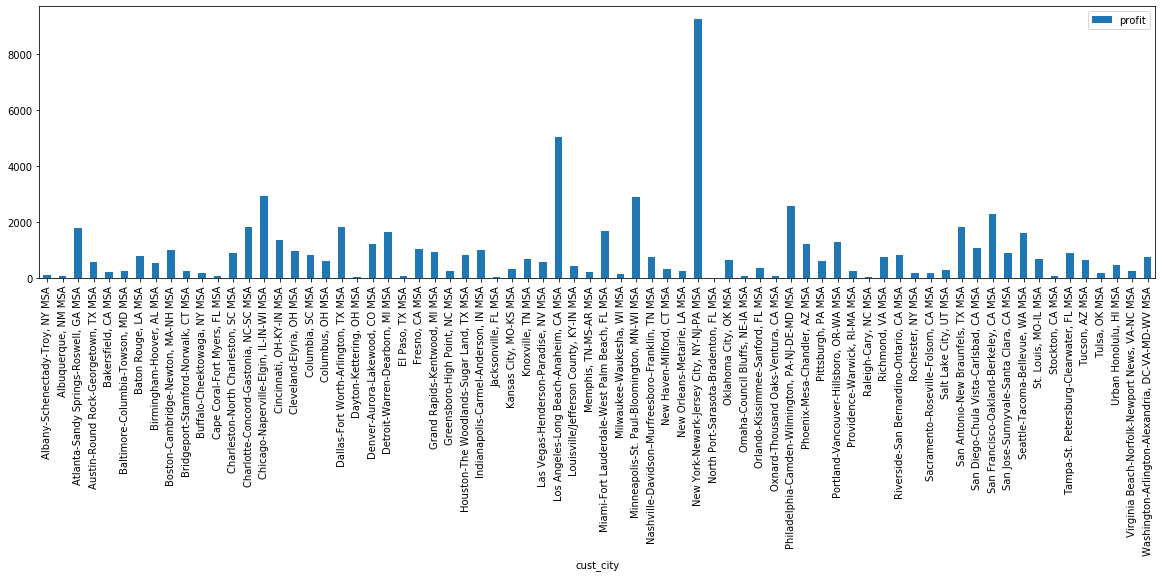

In [27]:
#72 cities
city_prof = df.groupby(['cust_city']).agg({'profit':'sum'})
city_prof.plot(kind='bar',figsize=(20, 5))

As for the first hypothesis, the difference in profit is not a large amount. This also proves that ultimate is more profitable.

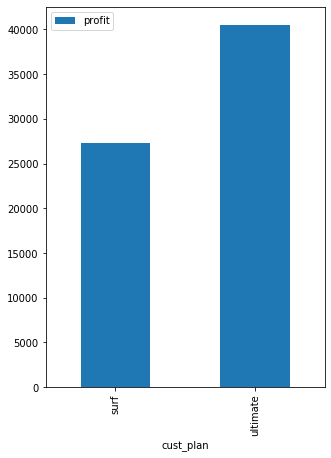

In [28]:
plan_prof = df.groupby(['cust_plan']).agg({ 'profit':'sum'})
plan_prof.plot(kind='bar',figsize=(5, 7))

I would recommend Megaline focus on advertising Surf for the new year and maybe raising their prices.

In [29]:
over_lim = surf[surf['profit'] > 20]
len(over_lim)

608

Surf has 262 customers and yet, the amount of times customers have gone over their limit is 2.3x that. The average user of Surf sees themselves going over the plan's limit multiple times a month and is okay with that because of it's affordable nature. The average user of Ultimate pays for enough text, call, and internet per month that they don't go over their plan's limit at all.